# Pymaceuticals Inc.
---

### Analysis

- The first observation that can be made from the data is that there is a positive correlation shown on the scatter plot of the mouse weight vs. the average observed tumor volume. The correlation coefficient was 0.84, solidifying the fairly strong positive relationship observation. 
- The second observation that Infubinol is shown on the box plot to have an outlier at 36.32. It is the only one of the four drugs on the box plot to have an outlier. 
- The third observation is that the drug Capomulin was mostly successful at reducing the tumor volume overtime. In the line graph (tumor volume vs. the time point for a single mouse treated with Capomulin) as the time increases the tumor volume mostly decreases from day 0 to around day 35. After day 35 there seems to be a steady incline progressing. 
- The fourth observation is that there seems to be almost no difference between the the distribution of unique female versus male mice used in the study. The percentage of the female count was 49.6% and the percentage of the male count was 50.4%.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how= "left", on=["Mouse ID"])


# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(mouse_study_complete["Mouse ID"].unique())
mice_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicate_rows = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_duplicate_rows
#Used Xpert Learning Assistant

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
data_duplicate_mice = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] == "g989", :]
data_duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_complete.loc[mouse_study_complete["Mouse ID"].isin(mice_duplicate_rows) == False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = len(clean_df["Mouse ID"].unique())
mice_count_cleaned


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen_data = clean_df.set_index(["Drug Regimen"])
drug_groups = drug_regimen_data.groupby('Drug Regimen')
drug_mean = drug_groups['Tumor Volume (mm3)'].mean()
drug_median = drug_groups['Tumor Volume (mm3)'].median()
drug_variance = drug_groups['Tumor Volume (mm3)'].var()
drug_std = drug_groups['Tumor Volume (mm3)'].std()
drug_sem = drug_groups['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":drug_mean, "Median Tumor Volume":drug_median, "Tumor Volume Variance":drug_variance, 
                                   "Tumor Volume Std. Dev.":drug_std, "Tumor Volume Std.Err.":drug_sem})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = drug_regimen_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

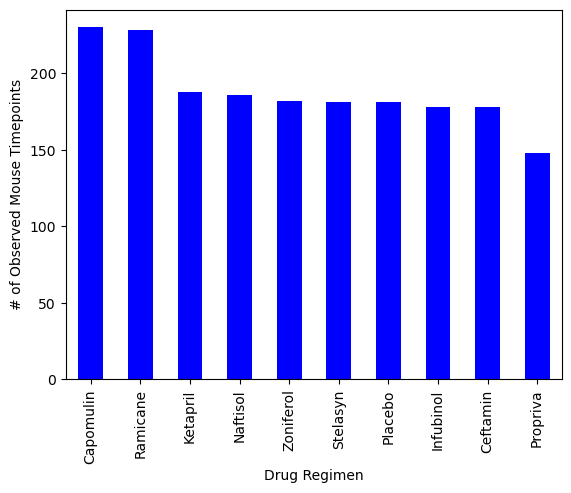

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_and_timepoint = clean_df[["Drug Regimen", "Timepoint"]]
mice_and_drug = drug_and_timepoint["Drug Regimen"].value_counts()
mice_and_drug_chart = mice_and_drug.plot(kind="bar", color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

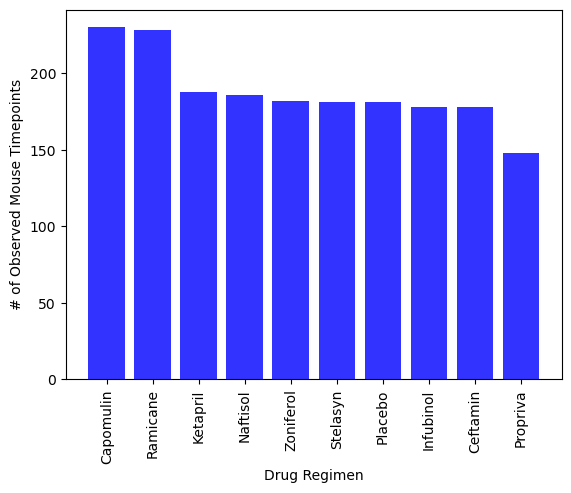

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_and_drug.index.values
y_axis = mice_and_drug.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


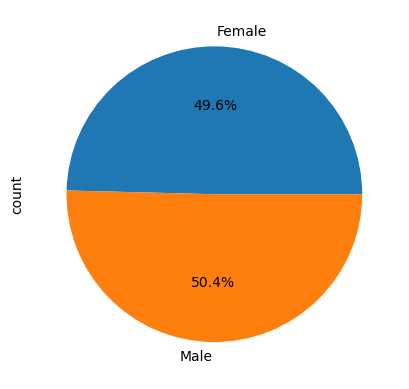

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study                 
                  
# Get the unique mice with their gender
gender_distribution = clean_df.groupby('Sex')['Mouse ID'].nunique()


# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', ylabel = 'count')
plt.show()  

#Used Xpert Learning Assistance

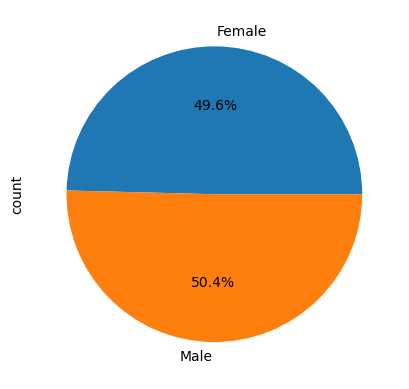

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_sex = gender_distribution.index.values
mice_value = gender_distribution.values

# Make the pie chart
plt.pie(mice_value, labels = mice_sex, autopct= "%1.1f%%")
plt.ylabel('count')
plt.show()




## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, clean_df, on=['Drug Regimen', "Mouse ID", "Timepoint"])
merged_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_names:
    treatment_data = merged_df[merged_df['Drug Regimen'] == treatment]
    tumor_volume_data.append(treatment_data['Tumor Volume (mm3)'].tolist())

for i, treatment in enumerate(treatment_names):
   # Convert tumor volumes to a Series for easier calculations
    volumes = pd.Series(tumor_volume_data[i]) 

# Calculate quartiles
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1

# Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

# Print the results
    print(f"The lower quartile is: {Q1}")
    print(f"The upper quartile is: {Q3}")
    print(f"The interquartile range is: {IQR}")
    print(f"Potential outliers are {outliers}")
   



The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
Potential outliers are Series([], dtype: float64)
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
Potential outliers are Series([], dtype: float64)
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
Potential outliers are 5    36.321346
dtype: float64
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
Potential outliers are Series([], dtype: float64)


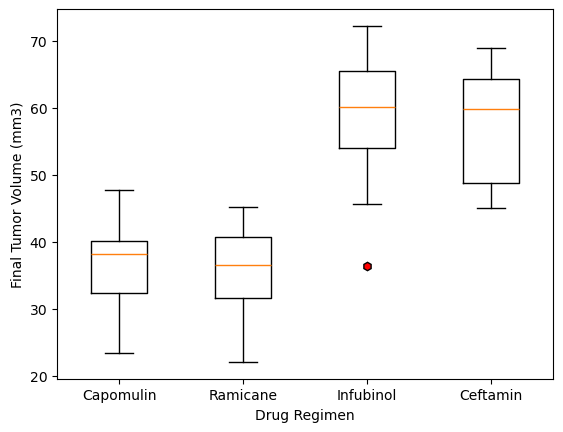

In [74]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
red_marker = dict(markerfacecolor="r",marker="h", markeredgecolor="black")
ax1.boxplot(tumor_volume_data, flierprops=red_marker)
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatment_names)
plt.show()

## Line and Scatter Plots

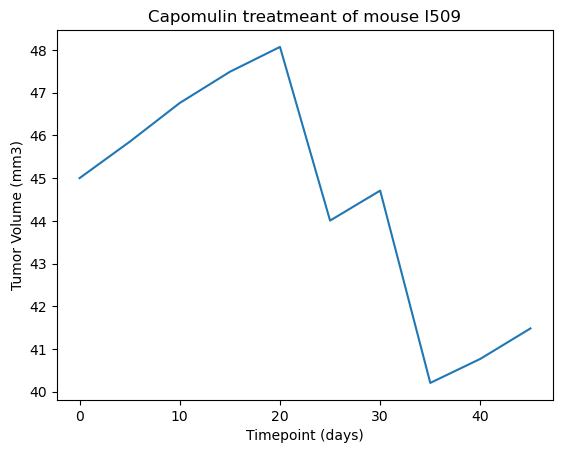

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509", :]

timepoint_values = line_df["Timepoint"]
tumor_vol_values = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse I509')
plt.plot(timepoint_values, tumor_vol_values)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

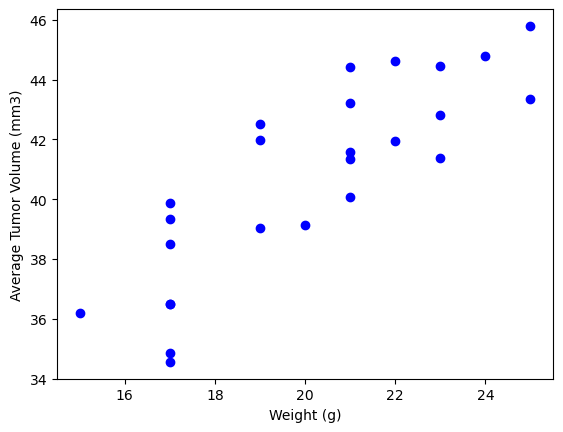

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_df = average_tumor_volume.merge(capomulin_df[['Mouse ID', 'Weight (g)']], on='Mouse ID').drop_duplicates()

# Generate a scatter plot of mouse weight versus average observed tumor volume
plt.scatter(average_df['Weight (g)'], average_df['Tumor Volume (mm3)'], color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()





## Correlation and Regression

In [81]:
# Calculate the correlation coefficient 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average observed tumor volume is {round(correlation[0],2)}")



The correlation coefficient between mouse weight and average observed tumor volume is 0.84


In [82]:
# Calculate the linear regression for mouse weight and average observed tumor volume for the entire Capomulin regimen
linear_regression = slope, intercept, r_value, p_value, std_err = st.linregress(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])
linear_regression

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

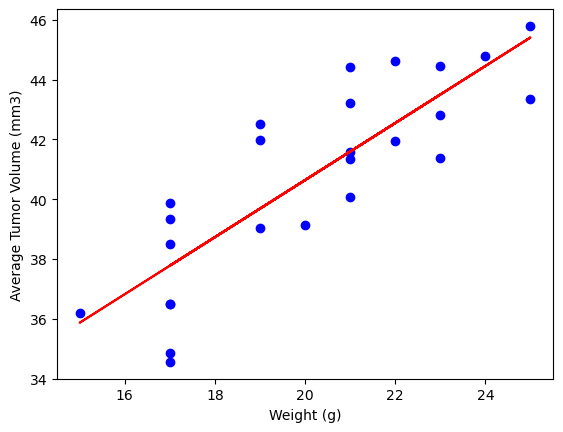

In [84]:
# Calculate the linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
regress_values = average_df["Weight (g)"] * slope + intercept
plt.scatter(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"], color="blue", label="Data Points")
plt.plot(average_df["Weight (g)"], regress_values, color="red", label="Regression Line")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
